# Coffee Shop Sales Analysis 2023

Objectives

1. Which month has high sales?
2. Which time on a day the sales are most active?
3. Which store location has high number of sales?
4. What are the different product categories?
5. Which product category has high number of sales?
6. Which product has high sales?
7. Which product is in more active in morning times?
8. Which product is in more active in afternoon times?
9. Which product is in more active in evening times?
10. Which day in a week has high number of sales?

In [ ]:
## By MANI SHANKAR VASA
## Dataset Source - KAGGLE

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
data = pd.read_excel('Coffee Shop Sales.xlsx')
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [8]:
data.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [9]:
data['week_day'] = data['transaction_date'].dt.strftime('%A')
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,week_day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday


In [14]:
data.transaction_time.unique()

array([datetime.time(7, 6, 11), datetime.time(7, 8, 56),
       datetime.time(7, 14, 4), ..., datetime.time(10, 34, 30),
       datetime.time(12, 3, 24), datetime.time(16, 59, 49)], dtype=object)

In [28]:

data['time_period'] = data['transaction_time'].apply(lambda x: 'morning' if 6 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 18 else 'evening'))

### 1. Which month has high sales?

In [36]:
data.groupby(data['transaction_date'].dt.strftime('%m'))['transaction_qty'].sum()

transaction_date
01    24870
02    23550
03    30406
04    36469
05    48233
06    50942
Name: transaction_qty, dtype: int64

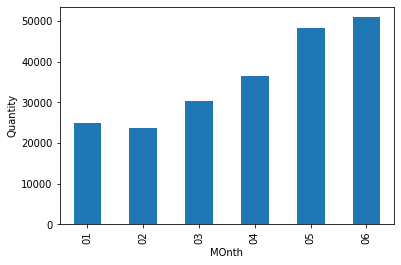

In [39]:
data.groupby(data['transaction_date'].dt.strftime('%m'))['transaction_qty'].sum().plot(kind = 'bar')
plt.ylabel('Quantity')
plt.xlabel('MOnth')
plt.show()

### 2. Which time on a day the sales are most active?

In [41]:
data.groupby(data['time_period'])['transaction_qty'].sum()

time_period
afternoon     76540
evening       20301
morning      117629
Name: transaction_qty, dtype: int64

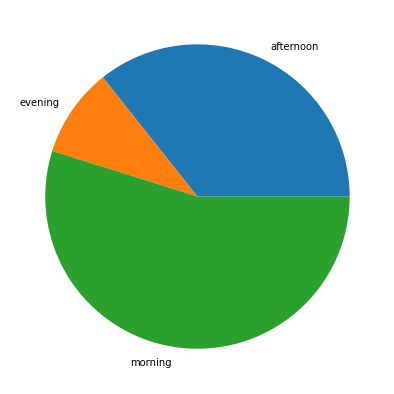

In [51]:
plt.figure(figsize = (13, 7))
data.groupby(data['time_period'])['transaction_qty'].sum().plot(kind = 'pie')
plt.ylabel('')
plt.show()

### 3. Which store location has high number of sales?

In [59]:
data.groupby(data['store_location'])['transaction_qty'].count()

store_location
Astoria            50599
Hell's Kitchen     50735
Lower Manhattan    47782
Name: transaction_qty, dtype: int64

<AxesSubplot:xlabel='store_location'>

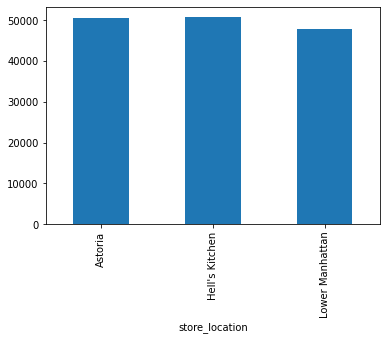

In [58]:
data.groupby(data['store_location'])['transaction_qty'].count().plot(kind = 'bar')

### 4. What are the different product categories?

In [62]:
pd.DataFrame(data.product_category.unique())

,0
0,Coffee
1,Tea
2,Drinking Chocolate
3,Bakery
4,Flavours
5,Loose Tea
6,Coffee beans
7,Packaged Chocolate
8,Branded


### 5. Which product category has high number of sales?

In [68]:
data.groupby('product_category')['transaction_qty'].sum()

product_category
Bakery                23214
Branded                 776
Coffee                89250
Coffee beans           1828
Drinking Chocolate    17457
Flavours              10511
Loose Tea              1210
Packaged Chocolate      487
Tea                   69737
Name: transaction_qty, dtype: int64

<AxesSubplot:xlabel='product_category'>

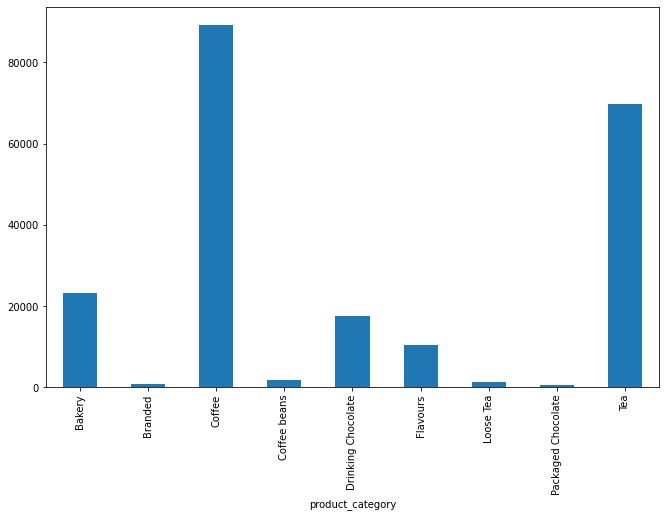

In [73]:
plt.figure(figsize = (11, 7))
data.groupby('product_category')['transaction_qty'].sum().plot(kind = 'bar')

### 6. Which product has high sales?

In [77]:
pd.DataFrame(data.groupby('product_type')['transaction_qty'].count().sort_values(ascending = False))

,transaction_qty
product_type,
Brewed Chai tea,17183
Gourmet brewed coffee,16912
Barista Espresso,16403
Hot chocolate,11468
Brewed Black tea,11350
Brewed herbal tea,11245
Scone,10173
Organic brewed coffee,8489
Drip coffee,8477


### 7. Which product is in more active in morning times?

In [93]:
pd.DataFrame(data.loc[data.time_period == 'morning'].groupby('product_type')['transaction_qty'].count().sort_values(ascending = False)[:1])

,transaction_qty
product_type,
Brewed Chai tea,8997


### 8. Which product is in more active in afternoon times?

In [94]:
pd.DataFrame(data.loc[data.time_period == 'afternoon'].groupby('product_type')['transaction_qty'].count().sort_values(ascending = False)[:1])

,transaction_qty
product_type,
Gourmet brewed coffee,6406


### 9.Which product is in more active in evening times?

In [96]:
pd.DataFrame(data.loc[data.time_period == 'evening'].groupby('product_type')['transaction_qty'].count().sort_values(ascending = False)[:1])

,transaction_qty
product_type,
Brewed Chai tea,1814


### 10. Which day in a week has high number of sales?

In [101]:
data.groupby('week_day')['transaction_qty'].sum()

week_day
Friday       31207
Monday       31231
Saturday     29614
Sunday       30182
Thursday     31162
Tuesday      30449
Wednesday    30625
Name: transaction_qty, dtype: int64

<AxesSubplot:xlabel='week_day'>

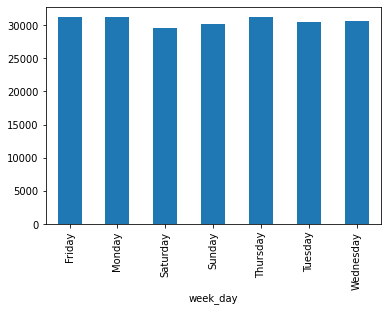

In [103]:
data.groupby('week_day')['transaction_qty'].sum().plot(kind = 'bar')